In [5]:
# Heather Marie
# DA 320
# Sources: Vincent Hong, Natalia Sadkov, Statistica.com, Wikipedia.com, and example code provided by Professor Spence

In [6]:
# Import modules
import json
import pymongo
import certifi
import pandas as pd
from matplotlib import pyplot
import numpy as  np

# Loading the json file that containins my secret MongoDB connection string
with open (r'C:\Users\hsely\OneDrive\Documents\GitHub\DA320\Week 5\credentials.json') as u:
    data = json.load(u)

secret_key = data['mongodb']

# We can safely print the length of the secret key. That won't leak any sensitive information.
print(f"My secret key is {len(secret_key)} characters in length.")

My secret key is 67 characters in length.


In [7]:
# Connecting to the database using known good certificates
client = pymongo.MongoClient(secret_key, tlsCAFile=certifi.where())

# Fetching my database titled "DA320"
da320_database = client['AssignmentNoSQLDatabases']

# Accessing my collections from my "DA320" database
allCollections = da320_database.list_collection_names()

# Print statements that display the current version as well as the collections present in DA320
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 5.0.13.
This database has the collections ['1']


In [8]:
# Retrieving all records from the "IMDB" collection
cursor = da320_database["1"].find()

# Converting the information into a Pandas dataframe
imdb = pd.DataFrame(cursor)

# Displaying the first few records 
imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company,movie_id,description,score,thumbnail
0,6348ccba7e3e9a7b0d870e18,77631,Grease,110,7.2,265183,TV-14::(D),6/13/1978,6000000,60759,394955690,"Comedy, Musical, Romance","John Travolta, Olivia Newton-John, Stockard Ch...",Randal Kleiser,"Allan Carr, Neil A. Machlis, Robert Stigwood","Paramount Pictures, Robert Stigwood Organizati...",NaN,NaN,NaN,NaN
1,6348ccba7e3e9a7b0d870e19,78346,Superman,143,7.4,172769,TV-PG::(LV),12/10/1978,55000000,7465343,166200000,"Action, Adventure, Sci-Fi","Marlon Brando, Gene Hackman, Christopher Reeve...",Richard Donner,"Charles Greenlaw, Richard Lester, Alexander Sa...","Dovemead Films, Film Export A.G., Internationa...",NaN,NaN,NaN,NaN
2,6348ccba7e3e9a7b0d870e1a,77416,The Deer Hunter,183,8.1,334827,R,12/8/1978,15000000,NULL,NULL,"Drama, War","Robert De Niro, John Cazale, John Savage, Chri...",Michael Cimino,"Joann Carelli, Michael Cimino, Michael Deeley,...","EMI Films, Universal Pictures",NaN,NaN,NaN,NaN
3,6348ccba7e3e9a7b0d870e1b,77651,Halloween,91,7.7,267109,TV-14,10/25/1978,300000,NULL,70000000,"Horror, Thriller","Donald Pleasence, Jamie Lee Curtis, Nancy Kyes...",John Carpenter,"Moustapha Akkad, John Carpenter, Debra Hill, K...","Compass International Pictures, Falcon Interna...",NaN,NaN,NaN,NaN
4,6348ccba7e3e9a7b0d870e1c,77975,National Lampoon's Animal House,109,7.4,119917,"TV-14::(DLSV, TV Rating.)",7/27/1978,3000000,201747,3371006,Comedy,"Tom Hulce, Stephen Furst, Mark Metcalf, Mary L...",John Landis,"Ivan Reitman, Matty Simmons","Universal Pictures, Oregon Film Factory, Stage...",NaN,NaN,NaN,NaN


In [9]:
# Transforming the Release Date column to a datetime data type
imdb['release_date'] = pd.to_datetime(imdb['release_date'], errors='coerce')

# Transforming the Budget column to a numeric data type
imdb['budget'] = pd.to_numeric(imdb['budget'], errors='coerce')

# Transforming the Budget column to a numeric data type
imdb['runtime'] = pd.to_numeric(imdb['runtime'], errors='coerce')

imdb.head()


,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company,movie_id,description,score,thumbnail
0,6348ccba7e3e9a7b0d870e18,77631,Grease,110.0,7.2,265183,TV-14::(D),1978-06-13,6000000.0,60759,394955690,"Comedy, Musical, Romance","John Travolta, Olivia Newton-John, Stockard Ch...",Randal Kleiser,"Allan Carr, Neil A. Machlis, Robert Stigwood","Paramount Pictures, Robert Stigwood Organizati...",NaN,NaN,NaN,NaN
1,6348ccba7e3e9a7b0d870e19,78346,Superman,143.0,7.4,172769,TV-PG::(LV),1978-12-10,55000000.0,7465343,166200000,"Action, Adventure, Sci-Fi","Marlon Brando, Gene Hackman, Christopher Reeve...",Richard Donner,"Charles Greenlaw, Richard Lester, Alexander Sa...","Dovemead Films, Film Export A.G., Internationa...",NaN,NaN,NaN,NaN
2,6348ccba7e3e9a7b0d870e1a,77416,The Deer Hunter,183.0,8.1,334827,R,1978-12-08,15000000.0,NULL,NULL,"Drama, War","Robert De Niro, John Cazale, John Savage, Chri...",Michael Cimino,"Joann Carelli, Michael Cimino, Michael Deeley,...","EMI Films, Universal Pictures",NaN,NaN,NaN,NaN
3,6348ccba7e3e9a7b0d870e1b,77651,Halloween,91.0,7.7,267109,TV-14,1978-10-25,300000.0,NULL,70000000,"Horror, Thriller","Donald Pleasence, Jamie Lee Curtis, Nancy Kyes...",John Carpenter,"Moustapha Akkad, John Carpenter, Debra Hill, K...","Compass International Pictures, Falcon Interna...",NaN,NaN,NaN,NaN
4,6348ccba7e3e9a7b0d870e1c,77975,National Lampoon's Animal House,109.0,7.4,119917,"TV-14::(DLSV, TV Rating.)",1978-07-27,3000000.0,201747,3371006,Comedy,"Tom Hulce, Stephen Furst, Mark Metcalf, Mary L...",John Landis,"Ivan Reitman, Matty Simmons","Universal Pictures, Oregon Film Factory, Stage...",NaN,NaN,NaN,NaN


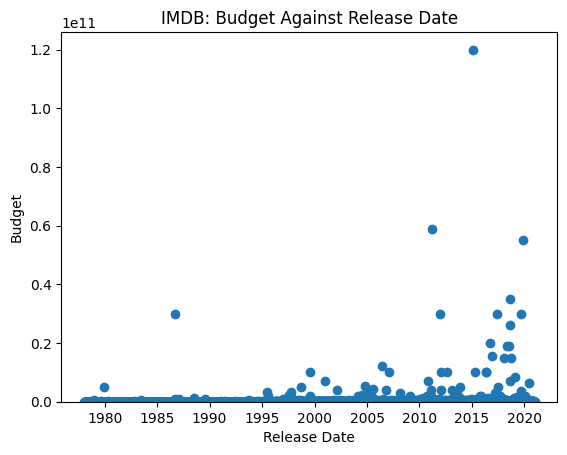

In [11]:
# Plotting Release Date Against Budget in a Scatter Plot
pyplot.title('IMDB: Budget Against Release Date')
pyplot.xlabel('Release Date')
pyplot.ylabel('Budget')
pyplot.scatter(imdb['release_date'], imdb['budget'])
pyplot.ylim(0,)

pyplot.show()

In [12]:
# Detecting the Top Outliers for Budget
imdb.sort_values("budget", ascending = False).head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company,movie_id,description,score,thumbnail
21559,6348ccc77e3e9a7b0d87624f,3921314,Muhammad: The Messenger of God,162.0,7.2,10764,NULL,2015-02-01,1.200000e+11,NULL,NULL,"Biography, Drama, History","Mahdi Pakdel, Sareh Bayat, Mina Sadati, Ali Re...",Majid Majidi,"Muhammad Mehdi Heidarian, Majid Majidi, Farzad...",Nourtaban Film Industry,NaN,NaN,NaN,NaN
17382,6348ccc47e3e9a7b0d8751fe,3131744,Deportees 3,112.0,2.4,1631,NaN,2011-03-17,5.900000e+10,NULL,NULL,"Action, Comedy, Drama","Akbar Abdi, Armin Alavi, Kamand Amirsoleimani,...",Masoud Dehnamaki,"Saeed Bagheri, Masoud Dehnamaki, Mohamad Reza ...",", , , ,",NaN,NaN,NaN,NaN
28238,6348cccb7e3e9a7b0d877c66,11296132,The Singer,107.0,4.5,1594,NaN,2019-11-06,5.500000e+10,NULL,NULL,"Comedy, Drama, Music, Romance","Ziba Hajian, Parviz Parastui, Elnaz Shakerdoos...",Mostafa Kiayee,"Shahin Fardtombekiyan, Mostafa Kiayee","Filmiran, HA International, Karen Film",NaN,NaN,NaN,NaN
25980,6348ccc97e3e9a7b0d877394,8116428,Along With the Gods: The Last 49 Days,142.0,7.1,7171,Not Rated,2018-08-01,3.500000e+10,NULL,NULL,"Action, Drama, Fantasy","Ha Jung-woo, Ju Ji-Hoon, Hyang-gi Kim, Ma Dong...",Yong-hwa Kim,"Ji-sun Choi, Won Dong-Yeon, Yong-hwa Kim, Daes...","Dexter Studios, Realies Pictures",NaN,NaN,NaN,NaN
16604,6348ccc47e3e9a7b0d874ef4,1606384,My Way,137.0,7.6,11687,R,2011-12-22,3.000000e+10,NULL,NULL,"Action, Drama, War","Jang Dong-Gun, Joe Odagiri, Bingbing Fan, Kim ...",Je-kyu Kang,"Jong Chul Gil, Je-kyu Kang, Myung Chan Kang, Y...","Directors, SK Planet, CJ Entertainment",NaN,NaN,NaN,NaN


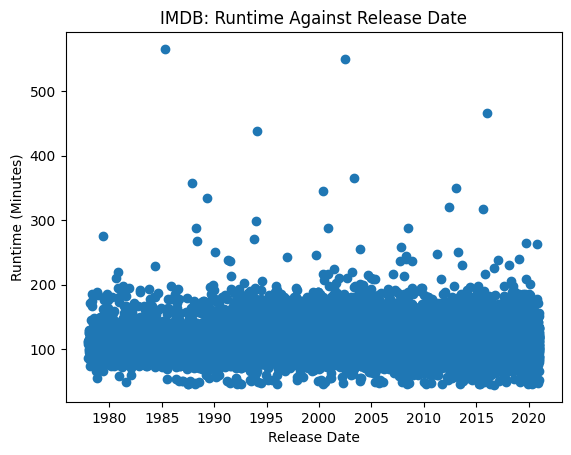

In [14]:
# Plotting Release Date Against Runtime in a Scatter Plot
pyplot.title('IMDB: Runtime Against Release Date')
pyplot.xlabel('Release Date')
pyplot.ylabel('Runtime (Minutes)')
pyplot.scatter(imdb['release_date'], imdb['runtime'])

pyplot.show()

In [15]:
# Detecting the Top Outliers for Runtime
imdb.sort_values("runtime", ascending = False).head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company,movie_id,description,score,thumbnail
1830,6348ccba7e3e9a7b0d87153e,90015,Shoah,566.0,8.7,9396,Not Rated,1985-04-30,NaN,NULL,NULL,"Documentary, History, War","Simon Srebnik, Michael Podchlebnik, Motke Zaïd...",Claude Lanzmann,", , , ,","British Broadcasting Corporation, Historia, Le...",NaN,NaN,NaN,NaN
8851,6348ccbf7e3e9a7b0d8730ab,389448,Tie Xi Qu: West of the Tracks,551.0,8.2,1163,NULL,2002-06-21,NaN,NULL,NULL,Documentary,", , , ,",Bing Wang,"Bing Wang, Zhu Zhu","Wang Bing Film Workshop, The Hubert Bals Fund ...",NaN,NaN,NaN,NaN
22743,6348ccc77e3e9a7b0d8766ef,5275892,O.J.: Made in America,467.0,8.9,19642,TV-MA,2016-01-22,NaN,NULL,NULL,"Documentary, Biography, Crime, History","Kareem Abdul-Jabbar, Mike Albanese, Muhammad A...",Ezra Edelman,"John Dahl, Ryan Dilts, Ezra Edelman, Cristina ...","ESPN Films, Laylow Films",NaN,NaN,NaN,NaN
4814,6348ccbc7e3e9a7b0d8720e6,111341,Satantango,439.0,8.3,10916,Not Rated,1994-02-08,NaN,NULL,NULL,Drama,"Mihály Vig, Putyi Horváth, László feLugossy, É...",Béla Tarr,"György Fehér, Joachim von Vietinghoff, Ruth Wa...","Mozgókép Innovációs Társulás és Alapítvány, Vo...",NaN,NaN,NaN,NaN
9271,6348ccbf7e3e9a7b0d87324f,346336,The Best of Youth,366.0,8.5,21923,R::(part 1),2003-05-20,NaN,NULL,2799773,"Drama, Romance","Luigi Lo Cascio, Alessio Boni, Adriana Asti, S...",Marco Tullio Giordana,"Angelo Barbagallo, Gianfranco Barbagallo, Dona...","BiBi Film, Rai Fiction, Film Commission Torino...",NaN,NaN,NaN,NaN
